# Week 1

## Intro to NumPy

This week is also about introducing Google Colab, however, that won't really be done in this repo..

----

### Exercise 1

Import numpy and print the version number

In [11]:
import numpy as np

print(np.__version__)

1.18.3


----

### Exercise 2

_2a._ Create a 1-D array of numbers from 0 to and with 9,
e.g.:

`x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`


In [34]:
print(np.arange(10))

[0 1 2 3 4 5 6 7 8 9]


_2b._ Create a 3x3 Boolean array of all `True`'s, e.g.:

```
array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])
```

In [33]:
print(np.full((3,3), True))

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


_2c._ Create a 5x3x4 array randomly filled with integers between 0 and 4, inclusive. E.g.

```
array([[[3, 4, 0, 4],
        [2, 3, 4, 4],
        [0, 2, 4, 2]],
 
       [[2, 1, 3, 0],
        [4, 3, 2, 2],
        [2, 1, 2, 4]],
 
       [[3, 1, 1, 1],
        [4, 4, 0, 1],
        [0, 2, 3, 0]],
 
       [[3, 0, 3, 3],
        [4, 0, 3, 3],
        [3, 3, 0, 1]],
 
       [[3, 2, 2, 2],
        [0, 1, 1, 4],
        [4, 2, 1, 0]]])
```

In [32]:
print(np.random.randint(0, 4, size=(5, 3, 4)))

[[[2 1 0 2]
  [1 1 2 2]
  [2 0 3 3]]

 [[3 0 2 0]
  [3 3 1 1]
  [0 3 2 2]]

 [[1 3 3 1]
  [2 0 2 0]
  [1 2 3 3]]

 [[0 3 2 3]
  [2 1 2 1]
  [3 1 2 1]]

 [[0 2 0 1]
  [0 2 1 0]
  [3 3 3 2]]]


-----

### Exercise 3

Use NumPy's vectorised operations to define a function that computes the dot product.

In [35]:
X = np.random.rand(100000)
Y = np.random.rand(100000)

In [36]:
def my_dot(X, Y):
    return np.sum(X * Y)

In [40]:
%timeit my_dot(X, Y)
print(my_dot(X, Y))
%timeit np.dot(X,Y)
print(np.dot(X,Y))
%timeit X.dot(Y)
print(X.dot(Y))

95.2 µs ± 5.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
24953.24051003745
20 µs ± 3.31 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
24953.240510037456
17.7 µs ± 224 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
24953.240510037456


__note__: Oh well, surely one ought to use `matrix1.dot(matrix2)`

-----

### Exercise 4

Let's look at a more interesting problem. Here's a classic technical interview problem:
> Given a stock’s price history as a sequence, and assuming that you are only allowed to make one purchase and one sale, what is the maximum profit that can be obtained? For example, given prices = (20, 18, 14, 17, 20, 21, 15), the max profit would be 7, from buying at 14 and selling at 21.


The straighforward solution, with  𝑂(𝑛2)  time complexity, consists of taking every combination of two consecutive prices and determining the maximum difference.

However, there's also an  𝑂(𝑛)  solution that consists of iterating through the sequence just once and finding the difference between each price and a running minimum. Here's an non-vectorised implementation:

In [42]:
def profit(prices):
    max_px = 0
    min_px= prices[0]
    for px in prices[1:]:
        min_px = min(min_px, px)
        max_px = max(px - min_px, max_px)
    return max_px

In [43]:
# Construct 'realistic' data

# Create mostly NaN array with a few 'turning points' (local min/max).
prices = np.full(100, fill_value=np.nan)
prices[[0, 10, 50, 80, -1]] = [80., 30., 50., 70., 40.]

# Linearly interpolate the missing values and add some noise.
x = np.arange(len(prices))
is_valid = ~np.isnan(prices)
prices = np.interp(x=x, xp=x[is_valid], fp=prices[is_valid])
prices += np.random.randn(len(prices)) * 2

Plot the constructed data:

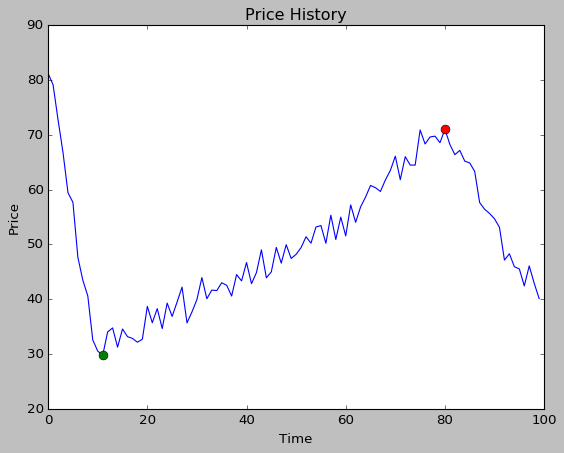

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

# Warning! This isn't a fully correct solution, but it works for now.
# If the absolute min came after the absolute max, you'd have trouble.
mn = np.argmin(prices)
mx = mn + np.argmax(prices[mn:])
kwargs = {'markersize': 8, 'linestyle': ''}

fig, ax = plt.subplots()
ax.plot(prices)
ax.set_title('Price History')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.plot(mn, prices[mn], marker='o', color='g', **kwargs)
ax.plot(mx, prices[mx], marker='o', color='r', **kwargs)
plt.show()

In [54]:
def my_profit(prices):
    """Price minus cumulative minimum price, element-wise."""
    runmin = np.minimum.accumulate
    return np.max(prices - runmin(prices))

my_profit(prices)

41.215290118586374

Time the solutions:

In [56]:
print("The maximum profit is", profit(prices))
%timeit profit(prices)

print("The maximum profit is", my_profit(prices))
%timeit my_profit(prices)

The maximum profit is 41.215290118586374
59.5 µs ± 3.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
The maximum profit is 41.215290118586374
6.74 µs ± 649 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Over a large dataset, you'll normally see significant performance differences. Our implementation of `my_profit` typically runs about 80x faster than `profit` over a random dataset with 1.000.000 datapoints. Do you get comparable results?

In [57]:
rand_seq = np.random.randint(0, 100, size=1000000)
%timeit profit(rand_seq)
%timeit my_profit(rand_seq)

643 ms ± 98.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.44 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


----

### Exercise 5

This next exercise is about extracting potentially useful information from a dataset. In this case, the `prices` vector created earlier.

_5a._ First, let's find all values in a given range. Extract all prices with values between 45 and 65 from the first 10 prices in `prices`.

I.e. all values where `45 < prices[:10] < 65` is `True`.

In [61]:
prices_subset = prices[:10]
print(prices_subset[(prices_subset > 45) & (prices_subset < 65)])

[59.43931081 57.6690631  47.63141578]


_5b._ Let's say that you want to buy in the first time the price drops below 30. Let's find the first occurence of a value meeting a condition.

In [63]:
print(np.argwhere(prices < 30))

[[11]]


_5c._ Let's get the positions and values of the top 10 prices overall. Use NumPy only to extract this information.

In [68]:
# Using np.argpartition we can define a function that find
# indicies of the n-max values:
def max_n(arr, n):
    return np.argpartition(arr, -n)[-n:]

The values are then simply found by using the indices on the original `prices`:

In [71]:
print("Positions of the top 5 prices")
print(max_n(prices, 5))
print("Values of the top 5 prices")
print(prices[max_n(prices, 5)])

Positions of the top 5 prices
[75 80  2  1  0]
Values of the top 5 prices
[70.86702458 70.98434172 72.71660898 79.09253656 81.17614869]


_5d._ Find the summary statics of `price`, i.e. the mean, median and std.dev.

In [75]:
print(f'Mean, median and std.dev.:\n' \
      f'\t{np.mean(prices)}\n' \
      f'\t{np.median(prices)}\n' \
      f'\t{np.std(prices)}')

Mean, median and std.dev.:
	50.46345028867765
	48.656841315254205
	12.17659692925846


_5e._ Finally, let's find all the local maxima in the `prices` array. If you are up for the challenge, you can try to use NumPy functions only. Otherwise, the package `scipy.signal` offers a nice function called `find_peaks`.

In [125]:
def find_local_maxima_1(prices):
    return np.where((prices[1:-1] > prices[0:-2]) & (prices[1:-1] > prices[2:]))[0] + 1

Now, that's test the speed and result compared with `scipy.signal.find_peaks`

In [133]:
from scipy.signal import find_peaks

print(find_local_maxima_1(prices))
%timeit find_local_maxima_1(prices)

print(find_peaks(prices)[0])
%timeit find_peaks(prices)[0]

[13 15 20 22 24 27 31 33 35 38 40 43 46 48 52 55 57 59 61 65 70 72 75 78
 80 83 93 97]
5.11 µs ± 241 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[13 15 20 22 24 27 31 33 35 38 40 43 46 48 52 55 57 59 61 65 70 72 75 78
 80 83 93 97]
15.1 µs ± 190 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The simple implementation `find_local_maxima_1()` is much faster, however, the method is very limited compared to `find_peaks`. Thus, some overhead is associated with more advanced and dynamic functionality.

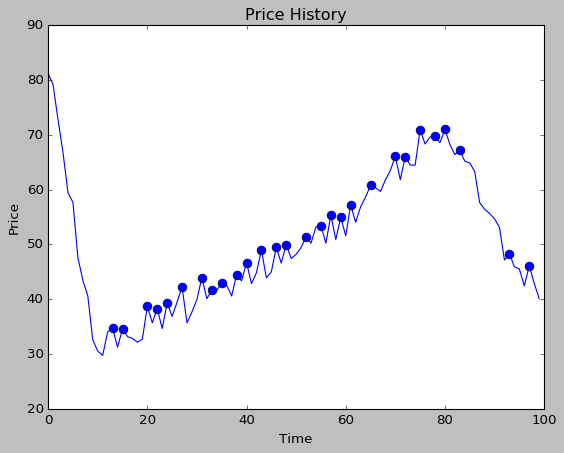

In [134]:
# Plot the found peaks
peaks = find_local_maxima_1(prices)

kwargs = {'markersize': 8, 'linestyle': ''}

fig, ax = plt.subplots()
ax.plot(prices)
ax.set_title('Price History')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.plot(peaks, prices[peaks], marker='o', color='b', **kwargs)
plt.show()